In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('insurace_fraud.csv')

In [83]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [84]:
df.shape

(1000, 40)

We have 1000 rows and 40 columns in our dataset.

In [85]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

_c39 column contains only null values, so we will drop it.

In [65]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [66]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


Data is skewed in months_as_customer,policy_deductable,umbrella_limit,insured_zip,capital-gains,total_claim_amount,injury_claim,property_claim ,vehicle_claim

In [5]:
df.drop('_c39',axis=1,inplace=True)

In [6]:
cat_features=df.select_dtypes(include=[np.object])
cat_features.head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,...,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N


In [11]:
for i in cat_features.columns:
    print(i ,cat_features[i].unique())
    print('\n')

policy_bind_date ['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011' '11-11-1998' '04-12-1995' '28-12-2002' '15-04

We can see collision_type ,police_report_available  contains '?', so we haveto treat them

In [12]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

There are 753 frauds not reported and 247 reported. Target variable is imbalanced.

In [13]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

Majorityof the umbrella limit is 0, which does not matter, So, we will see how data will react when given only values greater than 0.

In [8]:
a=df[df['umbrella_limit'] >0]

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

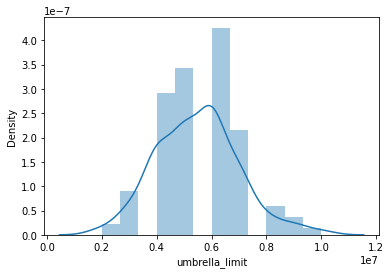

In [9]:
sns.distplot(a['umbrella_limit'])

We can see data is normally disributed.

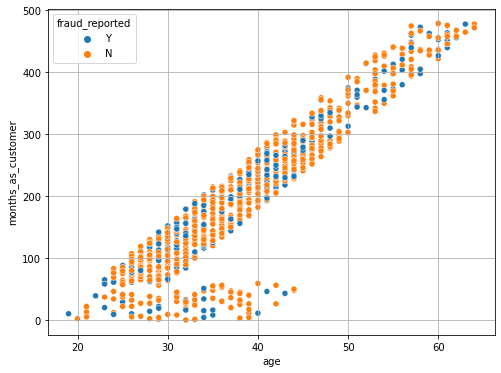

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='months_as_customer',hue='fraud_reported',data=df)
plt.grid(True)
plt.show()

We do not have any pattern which justifies if customers with more years with the company are claiming fraud insurance.

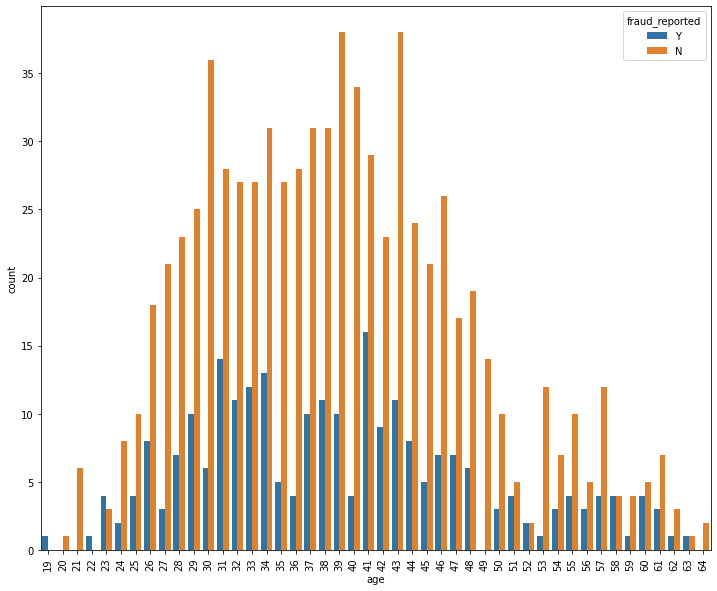

In [18]:
plt.figure(figsize=(12,10))
sns.countplot(x='age',hue='fraud_reported',data=df)
plt.xticks(rotation=90)
plt.show()

We can see youngesters are more likely to report than older people.

Now, we will see people who have reported fraud belongs to which occupation 

In [13]:
a=df[df['fraud_reported'] == 'Y']
a['insured_occupation'].value_counts()

exec-managerial      28
craft-repair         22
machine-op-inspct    22
tech-support         22
sales                21
transport-moving     21
prof-specialty       18
armed-forces         17
farming-fishing      16
protective-serv      14
priv-house-serv      12
other-service        12
adm-clerical         11
handlers-cleaners    11
Name: insured_occupation, dtype: int64

People who are working as exec-manager has claimed more fraud transactions

In [14]:
a['insured_education_level'].value_counts()

JD             42
MD             38
High School    36
Associate      34
PhD            33
Masters        32
College        32
Name: insured_education_level, dtype: int64

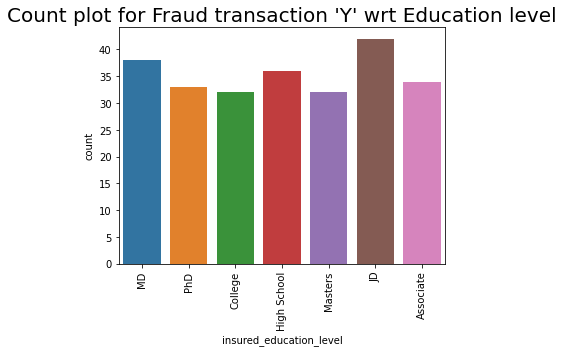

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Count plot for Fraud transaction 'Y' wrt Education level",fontsize=20)
sns.countplot('insured_education_level',data=a)
plt.xticks(rotation=90)
plt.tight_layout()

 people with JD level of education are also involved in more fraud transactions. 

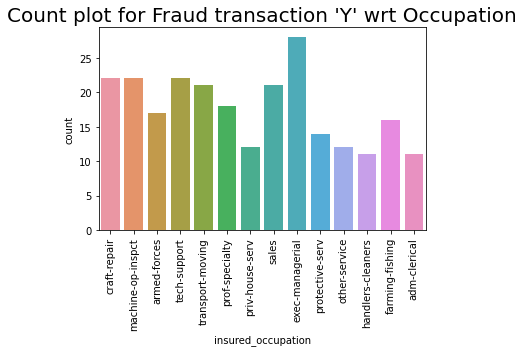

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.title("Count plot for Fraud transaction 'Y' wrt Occupation",fontsize=20)
sns.countplot('insured_occupation',data=a)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

People with occupation as Exec Manager seems to be doing more fraud transactions

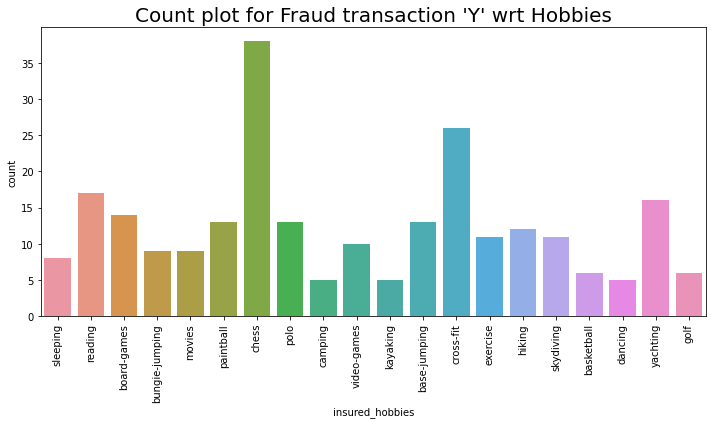

In [29]:
plt.figure(figsize=(10,6))
plt.title("Count plot for Fraud transaction 'Y' wrt Hobbies",fontsize=20)
sns.countplot('insured_hobbies',data=a)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

People who play more chess have claimed more fraud followed by cross-fit

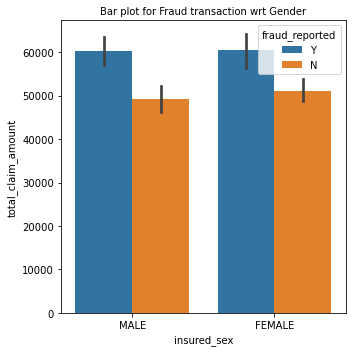

In [31]:
plt.figure(figsize=(5,5))
plt.title("Bar plot for Fraud transaction wrt Gender",fontsize=10)
sns.barplot(x='insured_sex',y='total_claim_amount',hue='fraud_reported',data=df)
plt.tight_layout()
plt.show()



Both Male and female have caimed same amount which are fraud


In [32]:
a['insured_relationship'].value_counts()

other-relative    52
not-in-family     45
wife              42
own-child         39
husband           35
unmarried         34
Name: insured_relationship, dtype: int64

In [33]:
df['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

Majority of claims arewith 1 vehicle involved.

In [34]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

Most of the incidents happen due to multiple vehicle collision.

In [35]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

Most of the collision occurs at rear side. There is also '?' in some columns which we will term as 'Not Applicable'

In [15]:
df['collision_type']=df['collision_type'].replace("?","Not Applicable")

In [16]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Not Applicable     178
Name: collision_type, dtype: int64

In [38]:
a['incident_city'].value_counts()

Arlington      44
Columbus       39
Springfield    38
Hillsdale      35
Northbend      34
Riverwood      30
Northbrook     27
Name: incident_city, dtype: int64

Majority of the fraud are reported in Arlington followed by Columnbus.

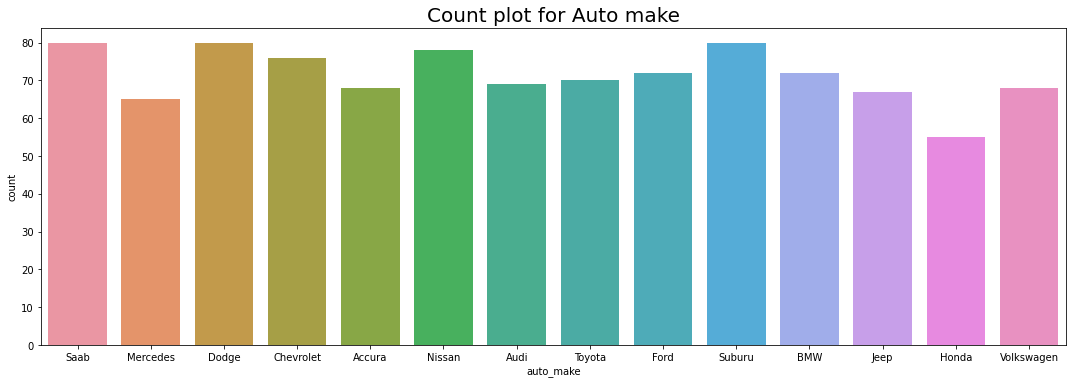

In [42]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.title("Count plot for Auto make",fontsize=20)
sns.countplot('auto_make',data=df)
plt.tight_layout()

Auto make of 'Saab' and 'Dodge' are having highest claim

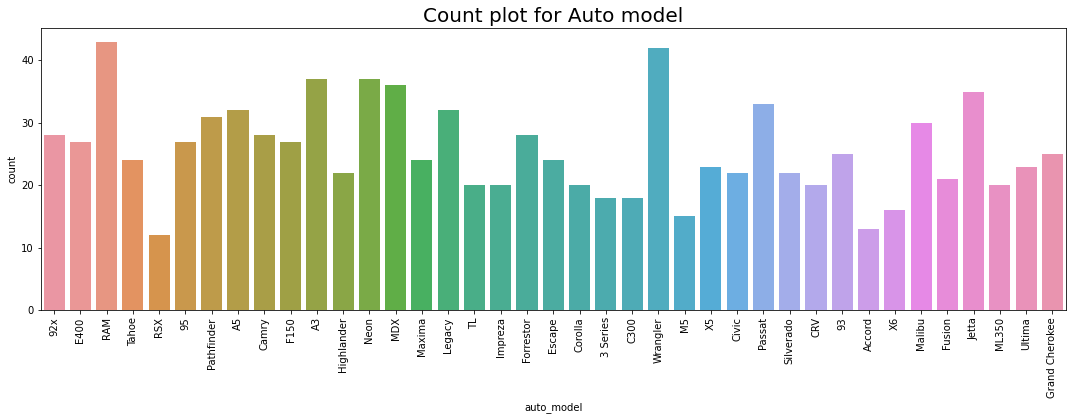

In [44]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
plt.title("Count plot for Auto model",fontsize=20)
sns.countplot('auto_model',data=df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Auto Model of RAM, Wrangler have claimed more transactions.

In [11]:
a['auto_make'].value_counts()

Chevrolet     19
Accura        18
Ford          17
Mercedes      17
Volkswagen    16
Suburu        16
BMW           15
Saab          15
Jeep          15
Toyota        14
Honda         11
Nissan        11
Dodge         11
Audi           6
Name: auto_make, dtype: int64

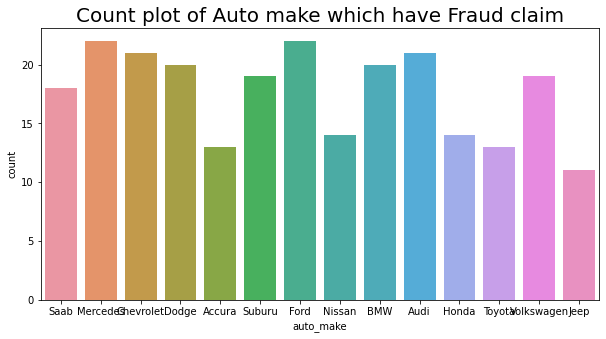

In [17]:
plt.figure(figsize=(10,5))
plt.title("Count plot of Auto make which have Fraud claim",fontsize=20)
sns.countplot('auto_make',data=a)
plt.show()

Auto make of 'Ford' and 'Mercedes' are having highest Fraud claim, 'Chevorlet' and 'Audi' also seems to be claimed equally having Fraud claims

In [48]:
a['bodily_injuries'].value_counts()

2    90
0    80
1    77
Name: bodily_injuries, dtype: int64

Most of the fruad claimed people have 2 bodily injuries.

In [49]:
a['police_report_available'].value_counts()

?      89
NO     86
YES    72
Name: police_report_available, dtype: int64

Majority of the fraud transactio have no police report available.

In [18]:
df['police_report_available']=df['police_report_available'].replace("?","Unknown")

In [19]:
df['umbrella_limit']=df['umbrella_limit'].replace(-1000000,0)

In [20]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,Unknown,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [22]:
#Extracting numerical column for further analysis
num_features = df.select_dtypes(include=[np.number])
num_features.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
dtype: object

In [23]:
#Removing outliers using z-score
from scipy.stats import zscore
z=np.abs(zscore(num_features))

In [24]:
df=df[(z<3).all(axis=1)]
df.shape

(980, 39)

We have 980 rows after removing outliers

In [25]:
cat_features.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [26]:
#Performing one hot encoding
df=pd.get_dummies(df,columns=['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model'],drop_first=True)

In [27]:
df.shape

(980, 2116)

In [28]:
#Performing Label Encoding for target variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['fraud_reported']=le.fit_transform(df['fraud_reported'])

In [29]:
#Separating x and y for model evaluation
x=df.drop('fraud_reported',axis=1)
y=df[['fraud_reported']]

#### Treating Class Imbalance in target column

In [30]:
from imblearn.over_sampling import SMOTE
x_upsample, y_upsample  = SMOTE().fit_resample(x, y)
print(x_upsample.shape)
print(y_upsample.shape)

(1480, 2115)
(1480, 1)


In [31]:
y_upsample.value_counts()

fraud_reported
1                 740
0                 740
dtype: int64

In [32]:
#Lets bring all columns to common scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_=sc.fit_transform(x_upsample)

### PCA

In [33]:
from sklearn.decomposition import PCA

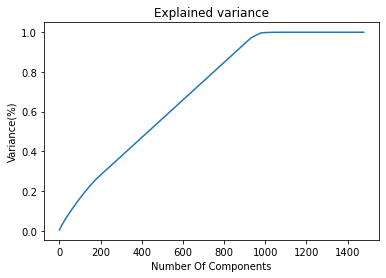

In [34]:
pca=PCA()
pricipleComponents=pca.fit_transform(x_)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number Of Components")
plt.ylabel('Variance(%)')
plt.title('Explained variance')
plt.show()

We can see 95% of variance is achieved by 950 columns.

In [35]:
pca=PCA(n_components=950)
new_data=pca.fit_transform(x_)
priciple_x=pd.DataFrame(new_data)

### Finding the best Random State

In [36]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(priciple_x,y_upsample,test_size=.30,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    predrf=lg.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS) 

Best accuracy is  0.8626126126126126  on Random_state  66


### Model Evaluation

In [37]:
#splitting data into training and testing datasets
x_train,x_test,y_train,y_test=train_test_split(priciple_x,y_upsample,test_size=.30,random_state=maxRS)

0.8175675675675675
[[166  48]
 [ 33 197]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       214
           1       0.80      0.86      0.83       230

    accuracy                           0.82       444
   macro avg       0.82      0.82      0.82       444
weighted avg       0.82      0.82      0.82       444



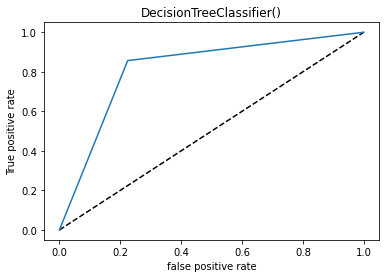

auc_score: 0.8161113368549371




In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=dtc)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(dtc)
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

0.8400900900900901
[[211   3]
 [ 68 162]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       214
           1       0.98      0.70      0.82       230

    accuracy                           0.84       444
   macro avg       0.87      0.85      0.84       444
weighted avg       0.87      0.84      0.84       444



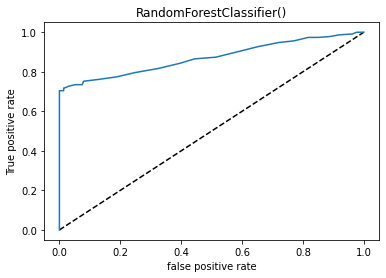

auc_score: 0.8451645672490857




In [39]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
#100 --> default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=rf)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(rf)
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

0.8626126126126126
[[176  38]
 [ 23 207]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       214
           1       0.84      0.90      0.87       230

    accuracy                           0.86       444
   macro avg       0.86      0.86      0.86       444
weighted avg       0.86      0.86      0.86       444



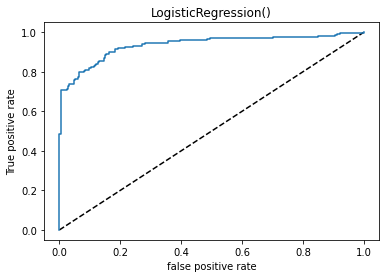

auc_score: 0.8612149532710279




In [40]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=lg)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(lg)
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

0.8468468468468469
[[206   8]
 [ 60 170]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       214
           1       0.96      0.74      0.83       230

    accuracy                           0.85       444
   macro avg       0.86      0.85      0.85       444
weighted avg       0.87      0.85      0.85       444



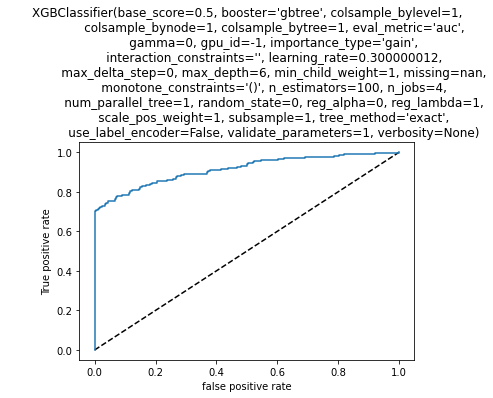

auc_score: 0.8508736286062576




In [41]:
from xgboost import XGBClassifier
xgb =XGBClassifier(eval_metric = 'auc', use_label_encoder=False, objective = 'binary:logistic')
xgb.fit(x_train,y_train)
xgb_pred=xgb.predict(x_test)
print(accuracy_score(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))
y_pred_prob=xgb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=xgb)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(xgb)
plt.show()
auc_score=roc_auc_score(y_test,xgb.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

### Checking cross validation score

In [42]:
from sklearn.model_selection import cross_val_score
dtscores=cross_val_score(dtc,priciple_x,y_upsample,cv=5)
print(dtscores)
print(dtscores.mean(),dtscores.std())

[0.56081081 0.68918919 0.86824324 0.89189189 0.86486486]
0.775 0.12936322101377642


In [43]:
rfscores=cross_val_score(rf,priciple_x,y_upsample,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.5        0.69256757 0.99662162 0.99662162 1.        ]
0.8371621621621621 0.20589158323435527


In [44]:
lgscores=cross_val_score(lg,priciple_x,y_upsample,cv=5)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.61486486 0.76351351 0.84797297 0.87837838 0.86824324]
0.7945945945945947 0.09855141450136136


In [45]:
xgbscores=cross_val_score(xgb,priciple_x,y_upsample,cv=5)
print(xgbscores)
print(xgbscores.mean(),xgbscores.std())

[0.51013514 0.7027027  0.96621622 0.97635135 0.97635135]
0.8263513513513512 0.18965435093053082


Least difference between cross val score and accuracy score is in Random Forest and XGBoost Model. So, we willfurther perform hyper parameter tuning on them.

### Hyper-Parameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

##### - Random Forest

In [47]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth': [4,5,6,7,8],
    'n_estimators': [100,500],
    'max_features':['auto','sqrt','log2']
    
}

In [48]:
grid_search=RandomizedSearchCV(estimator=rf,param_distributions=grid_param,cv=5)

In [49]:
grid_search.fit(x_train,y_train)
best_parameters=grid_search.best_params_
print(best_parameters)

{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'gini'}


0.8423423423423423
[[212   2]
 [ 68 162]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       214
           1       0.99      0.70      0.82       230

    accuracy                           0.84       444
   macro avg       0.87      0.85      0.84       444
weighted avg       0.88      0.84      0.84       444



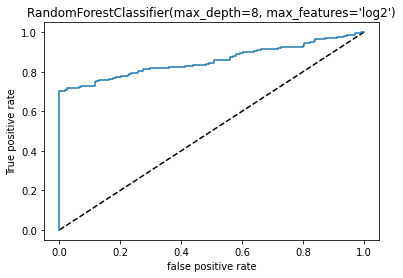

auc_score: 0.8475010158472166




In [53]:
rfc=RandomForestClassifier(criterion='gini',max_depth=8,max_features='log2',n_estimators=100)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))
y_pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=rfc)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(rfc)
plt.show()
auc_score=roc_auc_score(y_test,rfc.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

In [54]:
rfcscores=cross_val_score(rfc,priciple_x,y_upsample,cv=5)
print(rfcscores)
print(rfcscores.mean(),rfcscores.std())

[0.50337838 0.68918919 0.99662162 1.         1.        ]
0.8378378378378379 0.20579843266356201


##### - XG Boost

In [55]:
params_xgb = {'n_estimators': [100,400,800], 'learning_rate': [0.3,0.5,1],
             'max_depth': [6,8,15]}

In [56]:
grid_search=RandomizedSearchCV(estimator=xgb,param_distributions=params_xgb,cv=5)

In [57]:
grid_search.fit(x_train,y_train)
best_parameters=grid_search.best_params_
print(best_parameters)

{'n_estimators': 400, 'max_depth': 8, 'learning_rate': 0.3}


0.8513513513513513
[[207   7]
 [ 59 171]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       214
           1       0.96      0.74      0.84       230

    accuracy                           0.85       444
   macro avg       0.87      0.86      0.85       444
weighted avg       0.87      0.85      0.85       444



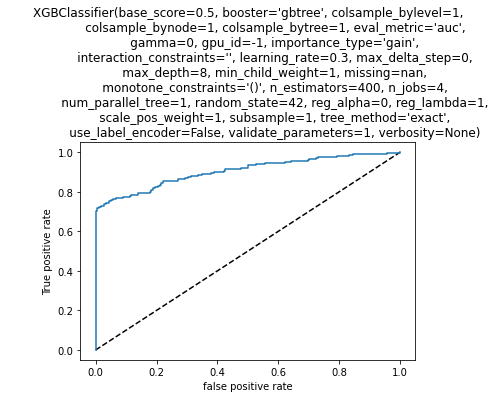

auc_score: 0.8553839902478668




In [58]:
xgbc =XGBClassifier(n_estimators=400 ,learning_rate=0.3 , max_depth= 8,eval_metric = 'auc', use_label_encoder=False, objective = 'binary:logistic',random_state=42)
xgbc.fit(x_train,y_train)
xgb_predc=xgbc.predict(x_test)
print(accuracy_score(y_test,xgb_predc))
print(confusion_matrix(y_test,xgb_predc))
print(classification_report(y_test,xgb_predc))
y_pred_prob=xgbc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=xgbc)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title(xgbc)
plt.show()
auc_score=roc_auc_score(y_test,xgbc.predict(x_test))
print("auc_score:" ,auc_score)
print("\n")

In [59]:
xgbscores=cross_val_score(xgbc,priciple_x,y_upsample,cv=5)
print(xgbscores)
print(xgbscores.mean(),xgbscores.std())

[0.52027027 0.68918919 0.96621622 0.99324324 0.95608108]
0.8249999999999998 0.18800789502095872


As the differnece between cross va score and accuracy is least in Random Forest, We will select it as our best model. Also, AUC Score is ~85%.

### Saving the model

In [60]:
import joblib
joblib.dump(rfc,'fruad.obj')

['fruad.obj']